In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

train = pd.read_csv("train_path.csv")
test = pd.read_csv("test_path.csv")

In [6]:
print(train.head())

   Unnamed: 0  PassengerId  Survived  Sex     Age      Fare  Pclass_1  \
0           0            1         0    1  0.2750  0.014151         0   
1           1            2         1    0  0.4750  0.139136         1   
2           2            3         1    0  0.3250  0.015469         0   
3           3            4         1    0  0.4375  0.103644         1   
4           4            5         0    1  0.4375  0.015713         0   

   Pclass_2  Pclass_3  Family_size  Title_1  Title_2  Title_3  Title_4  Emb_1  \
0         0         1          0.1        1        0        0        0      0   
1         0         0          0.1        1        0        0        0      1   
2         0         1          0.0        0        0        0        1      0   
3         0         0          0.1        1        0        0        0      0   
4         0         1          0.0        1        0        0        0      0   

   Emb_2  Emb_3  
0      0      1  
1      0      0  
2      0      1  
3 

In [9]:
# Fill missing values in 'Age' with median
if 'Age' in train.columns:
    train['Age'].fillna(train['Age'].median(), inplace=True)
if 'Age' in test.columns:
    test['Age'].fillna(test['Age'].median(), inplace=True)

# Fill missing values in 'Embarked' with mode if the column exists
if 'Embarked' in train.columns:
    train['Embarked'].fillna(train['Embarked'].mode()[0], inplace=True)

# Fill missing values in 'Fare' with median (for the test set)
if 'Fare' in test.columns:
    test['Fare'].fillna(test['Fare'].median(), inplace=True)

# Drop 'Cabin', 'Ticket', and 'Name' columns if they exist
columns_to_drop = ['Cabin', 'Ticket', 'Name']
train.drop(columns=[col for col in columns_to_drop if col in train.columns], inplace=True)
test.drop(columns=[col for col in columns_to_drop if col in test.columns], inplace=True)

# Convert 'Sex' and 'Embarked' to categorical variables if they exist
if 'Sex' in train.columns:
    train['Sex'] = train['Sex'].astype('category')
if 'Sex' in test.columns:
    test['Sex'] = test['Sex'].astype('category')
if 'Embarked' in train.columns:
    train['Embarked'] = train['Embarked'].astype('category')
if 'Embarked' in test.columns:
    test['Embarked'] = test['Embarked'].astype('category')

# Verify that there are no more missing values
print(train.isnull().sum())
print(test.isnull().sum())

Unnamed: 0     0
PassengerId    0
Survived       0
Sex            0
Age            0
Fare           0
Pclass_1       0
Pclass_2       0
Pclass_3       0
Family_size    0
Title_1        0
Title_2        0
Title_3        0
Title_4        0
Emb_1          0
Emb_2          0
Emb_3          0
dtype: int64
Unnamed: 0     0
PassengerId    0
Survived       0
Sex            0
Age            0
Fare           0
Pclass_1       0
Pclass_2       0
Pclass_3       0
Family_size    0
Title_1        0
Title_2        0
Title_3        0
Title_4        0
Emb_1          0
Emb_2          0
Emb_3          0
dtype: int64


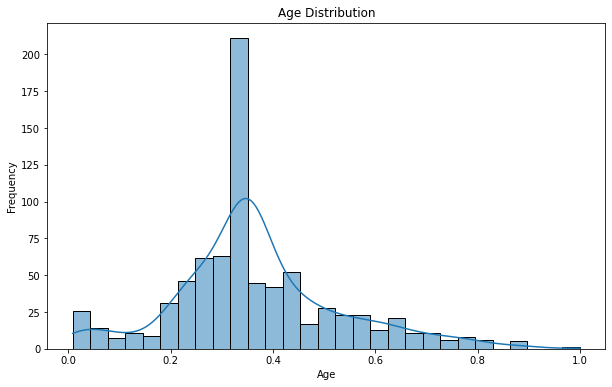

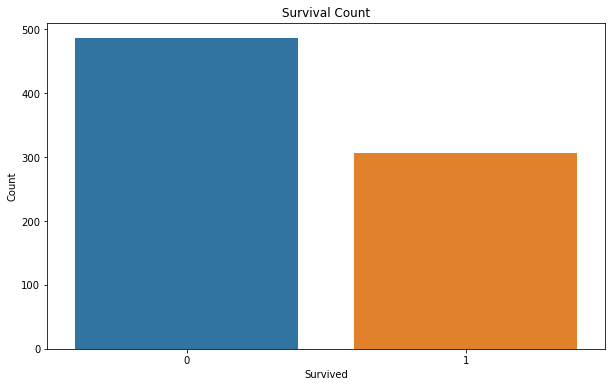

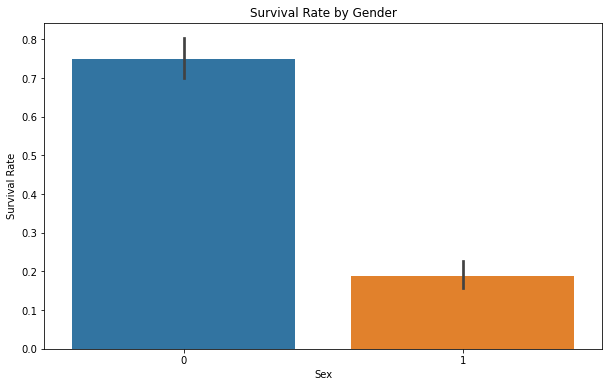

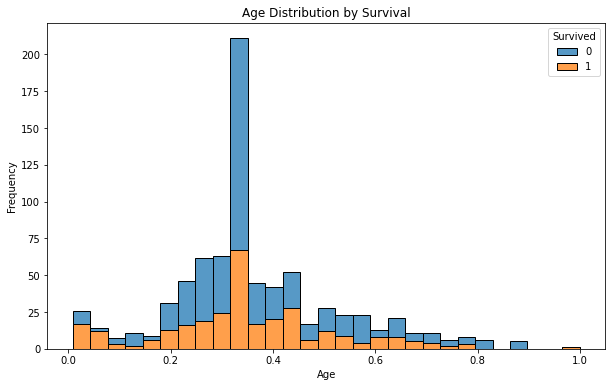

In [10]:
# Univariate Analysis

# Distribution of Age
if 'Age' in train.columns:
    plt.figure(figsize=(10, 6))
    sns.histplot(train['Age'], kde=True)
    plt.title('Age Distribution')
    plt.xlabel('Age')
    plt.ylabel('Frequency')
    plt.show()

# Count plot for 'Survived'
if 'Survived' in train.columns:
    plt.figure(figsize=(10, 6))
    sns.countplot(x='Survived', data=train)
    plt.title('Survival Count')
    plt.xlabel('Survived')
    plt.ylabel('Count')
    plt.show()

# Count plot for 'Pclass'
if 'Pclass' in train.columns:
    plt.figure(figsize=(10, 6))
    sns.countplot(x='Pclass', data=train)
    plt.title('Passenger Class Distribution')
    plt.xlabel('Pclass')
    plt.ylabel('Count')
    plt.show()

# Bivariate Analysis

# Survival rate by gender
if 'Sex' in train.columns and 'Survived' in train.columns:
    plt.figure(figsize=(10, 6))
    sns.barplot(x='Sex', y='Survived', data=train)
    plt.title('Survival Rate by Gender')
    plt.xlabel('Sex')
    plt.ylabel('Survival Rate')
    plt.show()

# Survival rate by class
if 'Pclass' in train.columns and 'Survived' in train.columns:
    plt.figure(figsize=(10, 6))
    sns.barplot(x='Pclass', y='Survived', data=train)
    plt.title('Survival Rate by Class')
    plt.xlabel('Pclass')
    plt.ylabel('Survival Rate')
    plt.show()

# Age distribution by survival
if 'Age' in train.columns and 'Survived' in train.columns:
    plt.figure(figsize=(10, 6))
    sns.histplot(data=train, x='Age', hue='Survived', multiple='stack')
    plt.title('Age Distribution by Survival')
    plt.xlabel('Age')
    plt.ylabel('Frequency')
    plt.show()